In [62]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import sklearn
import statsmodels.api as sm
from scipy.stats import uniform, expon, norm, probplot, percentileofscore
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [63]:
# importar dataframe

df = pd.read_csv('BlackFriday.csv')
df.dropna(inplace=True)
df.head()

User_ID Product_ID Gender    Age  Occupation City_Category  \
1   1000001  P00248942      F   0-17          10             A   
6   1000004  P00184942      M  46-50           7             B   
13  1000005  P00145042      M  26-35          20             A   
14  1000006  P00231342      F  51-55           9             A   
16  1000006   P0096642      F  51-55           9             A   

   Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
1                           2               0                   1   
6                           2               1                   1   
13                          1               1                   1   
14                          1               0                   5   
16                          1               0                   2   

    Product_Category_2  Product_Category_3  Purchase  
1                  6.0                14.0     15200  
6                  8.0                17.0     19215  
13                 2.0                 5.0     15665  
14                 8.0                14.0      5378  
16                 3.0                 4.0     13055

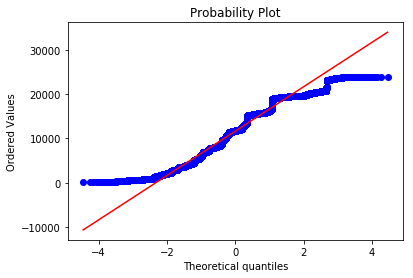

In [64]:
# o valor gasto parece não parece se ordenar de acordo com uma normal

probplot(df.Purchase, dist="norm", plot=plt);

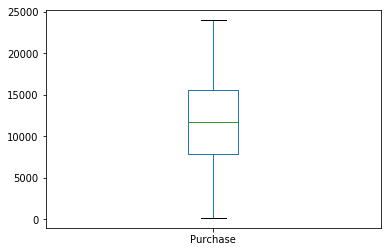

In [182]:
# Boxplor dos gastos dos clientes
# podemos ver que não há outliers de gasto em nossa tabela de gastos 

df.Purchase.plot.box();

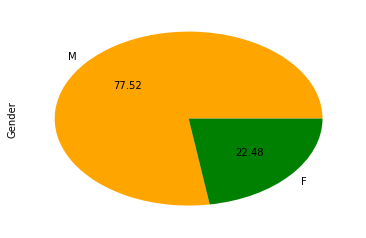

In [181]:
# gráfico de pizza com o genero dos consumidores (homem ou mulher)
# a grande maioria dos consumidores são homens

sexo = df['Gender'].value_counts()
sexo.plot(kind='pie', colors=('orange', 'green'), autopct="%0.2f",legend=False);

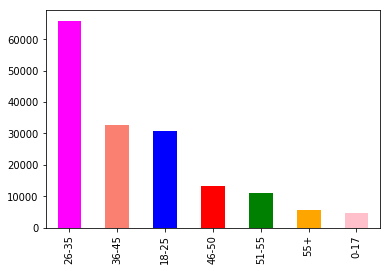

In [179]:
# gráfico de barras com as idades
# pode-se concluir que a maioria dos consumidores estao entre 18 e 45 anos

idades = df['Age'].value_counts()
idades.plot(kind='bar', color=('magenta', 'salmon', 'blue', 'red', 'green', 'orange', 'pink'), legend=False);

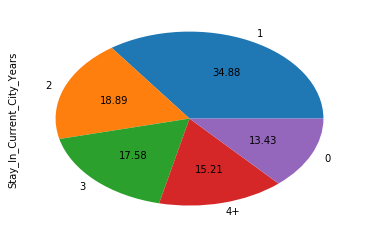

In [174]:
# gráfico de pizza com tempo do consumidor na cidade
# pode-se observar que quaase metade dos consumidores são novos na cidade 

tempo_cidade = df['Stay_In_Current_City_Years'].value_counts()
tempo_cidade.plot(kind='pie', autopct="%0.2f", legend=False);

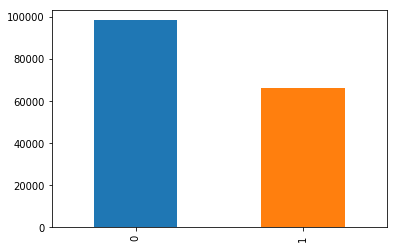

In [180]:
# gráfico de barras do estatus matrimonial
# observa-se que a maioria dos consumidores são solteiros

casados = df['Marital_Status'].value_counts()
casados.plot(kind='bar', legend=False);

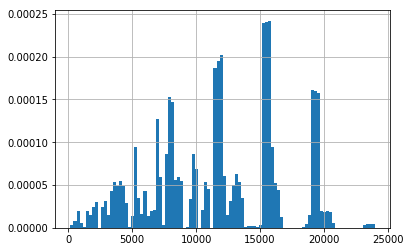

In [175]:
# histograma do valor gasto por pessoa
# parece apresentar várias tendencias em um gráfico só

df.Purchase.hist(density=True, bins=100);

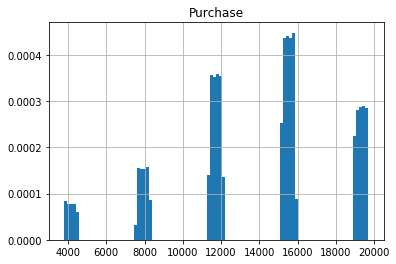

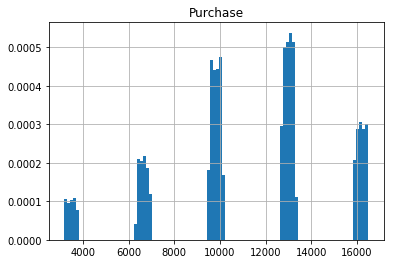

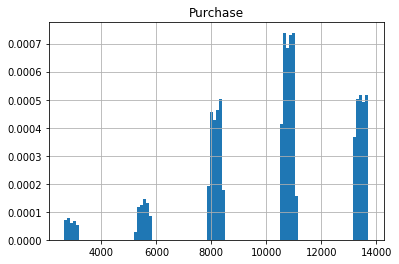

In [67]:
# todas as categorias apresentam tendencias semelhantes

df[df['Product_Category_1']==1].loc[:,['Purchase']].hist(density=True, bins=100);
df[df['Product_Category_1']==2].loc[:,['Purchase']].hist(density=True, bins=100);
df[df['Product_Category_1']==3].loc[:,['Purchase']].hist(density=True, bins=100);

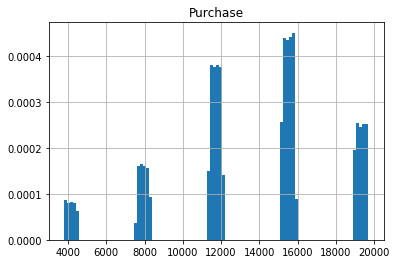

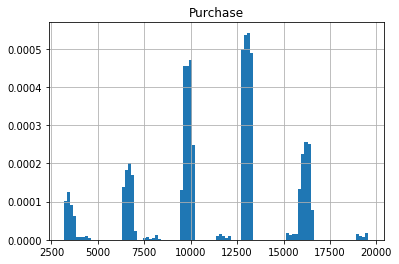

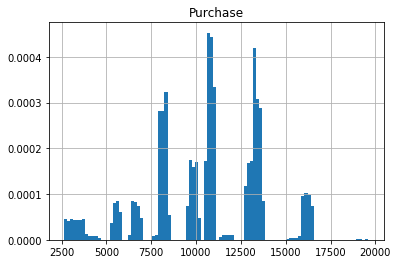

In [68]:
df[df['Product_Category_2']==2].loc[:,['Purchase']].hist(density=True, bins=100);
df[df['Product_Category_2']==3].loc[:,['Purchase']].hist(density=True, bins=100);
df[df['Product_Category_2']==4].loc[:,['Purchase']].hist(density=True, bins=100);

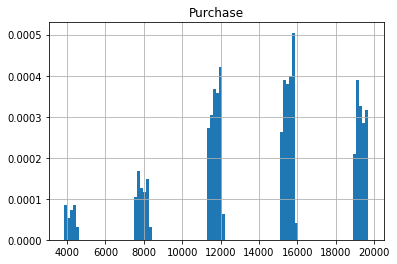

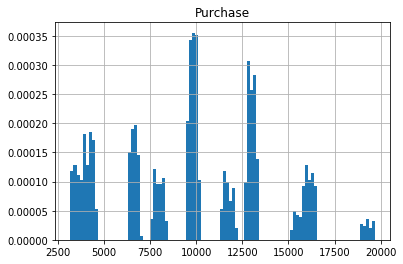

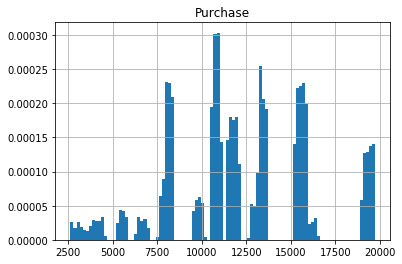

In [69]:
df[df['Product_Category_3']==3].loc[:,['Purchase']].hist(density=True, bins=100);
df[df['Product_Category_3']==4].loc[:,['Purchase']].hist(density=True, bins=100);
df[df['Product_Category_3']==5].loc[:,['Purchase']].hist(density=True, bins=100);

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

**Transformar variáveis qualitativas em binarias** 

In [104]:
s_idadesBinaria = pd.get_dummies(df, columns=['Age']).loc[:,['Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+']]
s_idadesBinaria.head()

Age_0-17  Age_18-25  Age_26-35  Age_36-45  Age_46-50  Age_51-55  Age_55+
1          1          0          0          0          0          0        0
6          0          0          0          0          1          0        0
13         0          0          1          0          0          0        0
14         0          0          0          0          0          1        0
16         0          0          0          0          0          1        0

In [108]:
s_SexoBinario = pd.get_dummies(df, columns=['Gender']).loc[:,['Gender_F', 'Gender_M']]
s_SexoBinario.head()

Gender_F  Gender_M
1          1         0
6          0         1
13         0         1
14         1         0
16         1         0

In [112]:
s_regiao = pd.get_dummies(df, columns=['City_Category']).loc[:,['City_Category_A', 'City_Category_B', 'City_Category_C']]
s_regiao.head()

City_Category_A  City_Category_B  City_Category_C
1                 1                0                0
6                 0                1                0
13                1                0                0
14                1                0                0
16                1                0                0

In [116]:
s_tempo_cidadeBinario = pd.get_dummies(df, columns=['Stay_In_Current_City_Years']).loc[:,['Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+']]
s_tempo_cidadeBinario.head()

Stay_In_Current_City_Years_0  Stay_In_Current_City_Years_1  \
1                              0                             0   
6                              0                             0   
13                             0                             1   
14                             0                             1   
16                             0                             1   

    Stay_In_Current_City_Years_2  Stay_In_Current_City_Years_3  \
1                              1                             0   
6                              1                             0   
13                             0                             0   
14                             0                             0   
16                             0                             0   

    Stay_In_Current_City_Years_4+  
1                               0  
6                               0  
13                              0  
14                              0  
16                              0

In [117]:
data0 = df.join(s_idadesBinaria, how='right', rsuffix=' ')
data1 = data0.join(s_SexoBinario, how='right', rsuffix=' ')
data2 = data1.join(s_regiao, how='right', rsuffix=' ')
data3 = data2.join(s_tempo_cidadeBinario, how='right', rsuffix=' ')

data3.dropna(inplace=True)
data = data3.drop(axis=1, columns=['Age', 'Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Occupation', 'Gender', 'City_Category'])
data.head()

User_ID Product_ID  Marital_Status  Purchase  Age_0-17  Age_18-25  \
1   1000001  P00248942               0     15200         1          0   
6   1000004  P00184942               1     19215         0          0   
13  1000005  P00145042               1     15665         0          0   
14  1000006  P00231342               0      5378         0          0   
16  1000006   P0096642               0     13055         0          0   

    Age_26-35  Age_36-45  Age_46-50  Age_51-55              ...                \
1           0          0          0          0              ...                 
6           0          0          1          0              ...                 
13          1          0          0          0              ...                 
14          0          0          0          1              ...                 
16          0          0          0          1              ...                 

    Gender_F  Gender_M  City_Category_A  City_Category_B  City_Category_C  \
1          1         0                1                0                0   
6          0         1                0                1                0   
13         0         1                1                0                0   
14         1         0                1                0                0   
16         1         0                1                0                0   

    Stay_In_Current_City_Years_0  Stay_In_Current_City_Years_1  \
1                              0                             0   
6                              0                             0   
13                             0                             1   
14                             0                             1   
16                             0                             1   

    Stay_In_Current_City_Years_2  Stay_In_Current_City_Years_3  \
1                              1                             0   
6                              1                             0   
13                             0                             0   
14                             0                             0   
16                             0                             0   

    Stay_In_Current_City_Years_4+  
1                               0  
6                               0  
13                              0  
14                              0  
16                              0  

[5 rows x 21 columns]

## **regressão linear**

In [118]:
x = np.array(data['Purchase'])
x_ = np.mean(x)

In [119]:
Sxx = np.sum((x - x_)**2)
Sxx

4241991329132.533

In [123]:
y = np.array(data['Gender_M'])
y_ = np.mean(y)

In [124]:
Sxy = sum((x - x_)*(y - y_))
Sxy

21094339.273487665

In [125]:
beta1 = Sxy / Sxx
beta0 = y_ - beta1 * x_

In [126]:
print("beta0: {0}".format(beta0))
print("beta1: {0}".format(beta1))

beta0: 0.7171987826430175
beta1: 4.972744552450878e-06
